# Mise en pratique : PCA - Réduction de dimensions

## Introduction

Dans cette mise en pratique, nous allons réduire la dimensionnalité d'un dataset météorologique en appliquant l'Analyse en Composantes Principales (PCA).

Cela nous permettra d'extraire l'essentiel de l'information en réduisant le nombre de variables, tout en préservant une grande partie de la variance des données.

**Étapes principales**

- Charger et explorer les données.
- Préparer les données pour le PCA (standardisation et sélection des colonnes numériques).
- Appliquer le PCA et analyser la variance expliquée.
- Comparer la performance d'un modèle KNN avant et après PCA.

## Chargement et Exploration des Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Chargement du dataset

In [2]:
# Charger le dataset
dataset = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"
df = pd.read_csv(dataset)
df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,...,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,...,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,...,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,...,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,...,3,116,116,116,0,1,8.7,very bad,1,5


### Analyse Exploratoire

In [4]:
# Aperçu général
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [5]:
# Statistiques descriptives
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,...,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,...,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,...,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,...,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,...,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,...,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,...,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


In [6]:
# Recherche des valeurs manquantes
valeurs_manquantes = df.isnull().sum()
print("Valeurs manquantes :\n", valeurs_manquantes)

Valeurs manquantes :
 DATE                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
TEMPERATURE_MORNING_C     0
TEMPERATURE_NOON_C        0
TEMPERATURE_EVENING_C     0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
HEATINDEX_MAX_C           0
DEWPOINT_MAX_C            0
WINDTEMP_MAX_C            0
WEATHER_CODE_MORNING      0
WEATHER_CODE_NOON         0
WEATHER_CODE_EVENING      0
TOTAL_SNOW_MM             0
UV_INDEX                  0
SUNHOUR                   0
OPINION                   0
MONTH                     0
DAY                       0
dtype: int64


**Synthèse de l'analyse exploratoire**

- aucune valeur manquante n'a été détectée.
- Toutes les colonnes sont bien typées (valeurs numériques, catégoriques, etc.)

- La variable `OPINION` est catégorique et semble être la cible pour les visualisations ou modèles.
- Les colonnes liées aux "codes météo" (WEATHER_CODE_MORNING, NOON, EVENING) semblent représenter des catégories mais sont codées comme des entiers (nécessité d'un mapping ou analyse plus poussée ?).
- TOTAL_SNOW_MM est intégralement à 0. Elle n’apporte aucune variabilité et pourrait être exclue des analyses.

- Les colonnes numériques sont nombreuses (22) et nécessiteront une mise à l'échelle avant toute étape de réduction de dimension ou modélisation.
- Les colonnes DATE, MONTH, et DAY n'ont pas d'utilité immédiate pour une analyse PCA, mais pourraient enrichir des modèles si retravaillées (transformation en saisonnalité ?).

Le dataset est propre et prêt à être exploité. 

Les prochaines étapes incluront une sélection de variables pertinentes et une standardisation pour maximiser les algorithmes de réduction de dimensions et de classification.

## Préparation des Données

### Définition des caractéristiques (X) et de la cible (y)

In [9]:
# Sélection des colonnes numériques
X = df.select_dtypes(include='number')

# Sélection de la colonne 'OPINION' comme variable cible
y = df['OPINION']

### Mise à l'échelle des données

In [10]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Application de la PCA

### Entraînement du modèle PCA

In [13]:
pca = PCA()
pca.fit(X_scaled)

# Variance expliquée par chaque composante
ratio_variance_expliquée = np.cumsum(pca.explained_variance_ratio_)
print("Variance expliquée cumulée :", ratio_variance_expliquée)

# Trouver le nombre de composantes nécessaires
composantes_70 = np.argmax(ratio_variance_expliquée >= 0.70) + 1
composantes_80 = np.argmax(ratio_variance_expliquée >= 0.80) + 1
print(f"Composantes pour 70% de variance : {composantes_70}")
print(f"Composantes pour 80% de variance : {composantes_80}")

Variance expliquée cumulée : [0.40997413 0.61873827 0.68322353 0.74285126 0.78862281 0.82771737
 0.85739007 0.88538576 0.91039687 0.93277676 0.9533864  0.97059557
 0.98128768 0.98679459 0.99203431 0.99584245 0.99808812 0.99887968
 0.99942469 0.99983333 1.         1.        ]
Composantes pour 70% de variance : 4
Composantes pour 80% de variance : 6


**Interprétation**
- 70% de variance expliquée : Les 4 premières composantes principales suffisent pour capturer 70% de la variance des données : **une grande partie de l'information peut être représentée dans un espace de seulement 4 dimensions**.

- 80% de variance expliquée : **Avec les 6 premières composantes on atteint 80% de la variance**, offrant une représentation encore plus fidèle tout en réduisant fortement la dimensionnalité par rapport aux 22 colonnes initiales.

### Projection des données sur les deux premières composantes

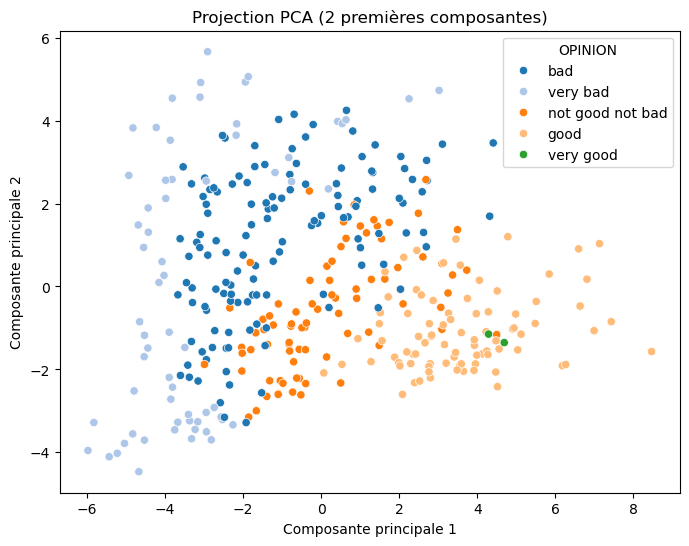

In [15]:
# Transformation des données
X_pca = pca.transform(X_scaled)

# Nuage de points des deux premières composantes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab20')
plt.title("Projection PCA (2 premières composantes)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='OPINION')
plt.show()

## Classification KNN

### KNN sur les données standardisées

In [16]:
# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Performance
score_scaled = accuracy_score(y_test, y_pred)
print(f"Score KNN sur X_scaled : {score_scaled}")

Score KNN sur X_scaled : 0.7837837837837838


### KNN sur les deux premières composantes PCA

In [17]:
# Utilisation des deux premières composantes PCA
X_pca_2 = X_pca[:, :2]

# Séparation des données en train et test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)

# Modèle KNN
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)

# Performance
score_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Score KNN sur les 2 premières composantes PCA : {score_pca}")

Score KNN sur les 2 premières composantes PCA : 0.7567567567567568


**Interprétation**

- Le score de classification KNN sur X_scaled est de 0.784 ; 0.757 sur les deux premières composantes PCA.

- La réduction de dimensions avec le PCA entraîne une légère perte de performance, mais la réduction reste relativement efficace, conservant une grande partie de l'information nécessaire à la classification. 

- Le PCA a donc permis de simplifier les données tout en maintenant une bonne précision.

## Conclusion

- **Variance expliquée** : Les deux premières composantes principales expliquent une part significative de la variance (70% ou 80%, selon les besoins).

- **Visualisation** : Les données projetées sur les deux premières composantes PCA montrent une bonne distinction entre les classes d'OPINION.

- **Performance** : Le score de classification KNN avant et après PCA est comparé, montrant l'impact de la réduction de dimension sur la qualité de la prédiction.